**Imports**

In [7]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

We will be using Fashion minst dataset that is available in the keras data library 

We obtain it through the keras dataset API

In [4]:
mnist = tf.keras.datasets.fashion_mnist

We will use the load data will give two sets of lists: one will be used to train and the other used to test the model

In [5]:
(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


We can view an example of what a training example and a training label look like 

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

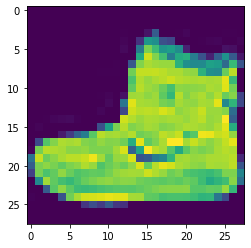

In [8]:
np.set_printoptions(linewidth = 200)
plt.imshow(training_images[0]) # Displays the image at the index 0
print(training_labels[0]) # Prints the value assigned at the index 0 
print(training_images[0]) # Prints the array representing the images 

All vallues currently lie between 0 - 255. It would make the model more efficient to work with if our values lied between 0 - 1. A process called normalizing.

In [9]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0 

In [10]:
# Initialization of the model 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

- Sequential - Defines a sequence of layers 
- Flatten - Converts the 2d array to a 1d array 
- Dense - Adds a Layer of neurons. Each layer of neurons needs an activation function to tell them what to do.
- Relu - Means  that "If X > 0 return X" else return 0 -- This results in only values greater than zero being passed to the next layer of the neural network
- Softmax- Takes a set/array of values and returns the greatest one.

In [12]:
# Train the model 
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4973 - accuracy: 0.8252
Epoch 2/15
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3715 - accuracy: 0.8661
Epoch 3/15
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3338 - accuracy: 0.8784
Epoch 4/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3109 - accuracy: 0.8863
Epoch 5/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2919 - accuracy: 0.8924
Epoch 6/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2795 - accuracy: 0.8970
Epoch 7/15
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2684 - accuracy: 0.9006
Epoch 8/15
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2557 - accuracy: 0.9058
Epoch 9/15
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2464 - accuracy: 0.9095
Epoch 10/15
60

In [14]:
# Test the model 
model.evaluate(testing_images,testing_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3562 - accuracy: 0.8843


[0.3562468178987503, 0.8843]

In [15]:
# SEE THE RESULTS OF MAKING A FEW CHANGES AND PARAMETERS 

In [17]:
classifications = model.predict(testing_images)
print(classifications[0])

[1.4983100e-07 1.5559297e-10 3.1672974e-07 5.2494994e-16 2.1393107e-07 8.8499663e-03 1.5684606e-08 6.2038349e-03 3.2921193e-06 9.8494220e-01]


The above list represents the probability that the image at the index 0 is classified under one of the values at 0 - 9

**Impact of having more neurons**

In [18]:
# Experiment with a model that has more neurons 
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
11493376/11490434 [==============================] - 1s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1856
Epoch 2/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0740
Epoch 3/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0483
Epoch 4/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0339
Epoch 5/5
10000/10000 [==============================] - 1s 109us/sample - loss: 0.0697
[2.5721378e-09 6.8235256e-10 3.7861634e-09 1.5230566e-05 1.3986398e-12 9.8488284e-09 2.0070634e-14 9.9998450e-01 7.6159390e-10 2.6174564e-07]
7


- Having more neurons in your neural net makes the training take longer but results in better model accuracy 
- More neurons being presents results in more calculations slowing down the model training process but as noted above the accuracy of the model does improve.
- This does not mean that the more neurons you have in your netwrk the better,  you canhit the law of diminishing return very quickly [ Might be infering to model overfitting]

- We know that we have ten classifications for the fashion. What would haven if we did not have 10 layers and iinstead put a smaller number 

- The number of neurons should match the number of classes that we would like to map our data to.

**Impact of Using an additional layer of neurons**

- What would be the impact of additional layers on the neural network
- In this case we will add one additional layer with 512 neurons and have the final neuron as expected with the ten neurons that represent the different classifications

In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1840
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0785
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0552
Epoch 4/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0409
Epoch 5/5
10000/10000 [==============================] - 1s 80us/sample - loss: 0.0767
[6.4146947e-12 1.1197429e-07 4.9128605e-08 2.3618780e-07 6.8813144e-10 3.1014424e-11 3.1402252e-13 9.9999118e-01 9.8889778e-11 8.4211579e-06]
7


- The impact of additional layers of neurons is not significant since we do not have data that is very complex.
- In other cases where the data is very complex, it may be necessary to have additional layers 

**Impact of Using more or less epochs**

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.1.0
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2612
Epoch 2/30
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1131
Epoch 3/30
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0772
Epoch 4/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0584
Epoch 5/30
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0447
Epoch 6/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0360
Epoch 7/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0273
Epoch 8/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0239
Epoch 9/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0186
Epoch 10/30
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0152
Epoch 11/30
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0127
E

- The model get a much better loss value with more epochs. At some point however the loss value stopd decreasing and begins increasing which is a side effect of overfiting.
- There is no point in training the neural network if you aren't improving your loss value 

**Impact of not normalizing the data before training the model**

In [23]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()



model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.1.0
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 48us/sample - loss: 2.5155
Epoch 2/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3500
Epoch 3/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2785
Epoch 4/30
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2607
Epoch 5/30
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2368
Epoch 6/30
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2197
Epoch 7/30
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2018
Epoch 8/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2007
Epoch 9/30
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1882
Epoch 10/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1850
Epoch 11/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1808
E

-  Failing to normalize the data results in very massive loss values despite the fact that the model prediction is accurate.
- Therefore normalizing the data results in better loss and thus better model efficiency 

**Create a call back to stop epochs once a desired accuracy is achieved**

- To do tthis we use call backs to stop the training once a desired accuracy is reached 
- This can also be used to prevent overfitting which can be noted when the loss values that were decreasing begin to increase and then continue fluctuating

In [29]:
import tensorflow as tf 
print(tf.__version__)

# create a call back class that has desired loss parameters 
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('loss') < 0.4):
            print("\nReached Loss < 0.4. Training has been cancelled!")
            self.model.stop_training = True
            
# Initialize an instance of the class myCallback()
callbacks = myCallback()

# Declare/Initialize the fashion dataset and load the data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()

# Normalize the data( training images and the testing images) 
training_images = training_images / 255.0
testing_images = testing_images / 255.0

# Initialize the layers of the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

# Train the mode;;
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5,callbacks = [callbacks])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4747 - accuracy: 0.8296
Epoch 2/5
59872/60000 [============================>.] - ETA: 0s - loss: 0.3574 - accuracy: 0.8694
Reached Loss < 0.4. Training has been cancelled!
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3573 - accuracy: 0.8694


In [30]:
import tensorflow as tf 
print(tf.__version__)

# create a call back class that has desired loss parameters 
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy') > 0.8):
            print("\nReached 80% accuracy. Training has been cancelled!")
            self.model.stop_training = True
            
# Initialize an instance of the class myCallback()
callbacks = myCallback()

# Declare/Initialize the fashion dataset and load the data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()

# Normalize the data( training images and the testing images) 
training_images = training_images / 255.0
testing_images = testing_images / 255.0

# Initialize the layers of the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

# Train the mode;;
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5,callbacks = [callbacks])

2.1.0
Train on 60000 samples
Epoch 1/5
59872/60000 [============================>.] - ETA: 0s - loss: 0.4799 - accuracy: 0.8285
Reached 80% accuracy. Training has been cancelled!
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4796 - accuracy: 0.8285
